# Explorative Datenanalyse (EDA)

Datensatz *Bike Sharing Demand Dataset*

Quelle und Informationen https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Bei Bike-Sharing-Systemen gibt es mehrere Standorte in einer Stadt, an denen man ein Fahrrad ausleihen und zurückgeben kann. Nutzer*innen können ein Fahrrad an einem Standort ausleihen und an einem anderen Standort zurückgeben. Für verschiedene Städte werden Informationen zur Nutzung der Bike-Sharing-Dienste als Open Data zur Verfügung gestellt. Wenn  diese Daten mit Wetterdaten, Besucherströme und Pendlerbewegungen kombiniert werden, können wir sie für die Untersuchung vieler Themen wie Optimierung der Verkehrsmobilität nutzen. Der folgende  Datensatz wird vom Capital Bikeshare Programm aus Washington, D.C. zur Verfügung gestellt.

Dieser Datensatz hat zwei Dateien, eine für die stündlichen (hour.csv) Datensätze und die andere für die täglichen (day.csv) Datensätze. Diese Daten wurden zwischen 2011. und 2012. gesammelt und enthalten entsprechende Wetter- und saisonale Informationen. In dieser Demo werden wir nur die stündliche Daten verwendet. Das sieht folgendermaßen aus:

![title](images/dataset.jpg)



hours.csv enthält folgende Attribute (Merkmale, Features):

* Instant – sample index
* Dteday – Date when the sample was recorded
* Season – Season in which sample was recorded
  * Spring – 1
  * Summer – 2
  * Fall – 3
  * Winter – 4
* Yr – Year in which sample was recorded
  * The year 2011 – 0
  * The year 2012 – 1
* Mnth – Month in which sample was recorded
* Hr – Hour in which sample was recorded
* Holiday – Weather day is a holiday or not
* Weekday  – Day of the week
* Workingday – If the day is neither weekend nor holiday is 1, otherwise is 0.
* Weathersit – Kind of weather that was that day when the sample was recorded
  * Clear, Few clouds, Partly cloudy, Partly cloudy – 1
  * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist – 2
  * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds – 3
  * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog – 4
* Temp – Normalized temperature in Celsius.
* Atemp – Normalized feeling temperature in Celsius.
* Hum – Normalized humidity.
* Windspeed – Normalized wind speed.
* Casual – Count of casual users
* Registered – Count of registered users
* Cnt – Count of total rental bikes including both casual and registered

## Bibliotheken

**NumPy** - Python-Bibliothek für wissenschaftliche Berechnungen.

**Pandas** - Bibliothek, die einfach zu verwendende und leistungsstarke Datenstrukturen und Analysewerkzeuge für Python bereitstellt.

**Matlotlib** - Python-Bibliothek für 2D-Plots. Mit ihr können wir Plots, Histogramme, Balkendiagramme, Scatterplots, etc. erstellen.

**Seaborn** - Datenvisualisierungsbibliothek, die auf der matplotlib-Bibliothek basiert. Sie bietet eine High-Level-API zum Zeichnen statistischer Grafiken.

In [1]:
# Import
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Daten laden und erste Übersicht

In [2]:
# Loading data using Pandas
data = pd.read_csv('data/hour.csv')

Mit der Pandas-Funktion head erhält  man einen ersten Überblick über den Datensatz. Die Funktion liefert die ersten fünf Datensätze sowie die Feature-Namen aus den geladenen Daten.

In [3]:
# Head
print(data.shape)
data.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Anhand dieser Ausgabe können wir sehen, dass wir 17379 Beobachtungen oder Datensätze mit jeweils 17 Features haben. Die Merkmale basieren auf unterschiedlichen Skalen. Einige Features tragen auch keine hilfreichen Informationen. Dies sind die Merkmale *instant* und *dteday* (von anderen Merkmalen ableitbar). Wir können diese beiden  Features entfernen:

In [4]:
drop_features = {"instant", "dteday"}
data = data.drop(columns = drop_features)
print(data.shape)
data.head()

(17379, 15)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Als nächstes prüfen wir die Datentypen der einzelnen Features. Auch hierzu verwenden wir Pandas:

In [5]:
data.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Alle Merkmale in den geladenen Daten sind vom Typ int64 oder float64. Das bedeutet, dass Machine Learning Modelle sie als quantitative Merkmale betrachten. 
Jedoch haben wir kategorische Variablen wie Saison, Jahr (yr), Monat (mnth) usw. haben. Wir müssen ihren Typ ändern. Das können wir folgendermaßen tun:

In [6]:
categorical_features = {"season", "yr", "mnth", "holiday", "hr", "workingday", "weekday", "weathersit"}
for feature in categorical_features:
    data[feature] = data[feature].astype("category")
    
data.dtypes

season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## Fehlende Werte
Es ist immer wichtig, zu Beginn den Datensatz auf fehlende Daten zu untersuchen. So können durchaus für einige Merkmlae in einige Beobachtungen, Werte fehlen. Diese Stellen müssen wir erkennen, um dann zu entscheiden, wie wir damit umgehen sollten. Mögliche Strategien wären bspw. Datensätze mit fehlenden Werte zu entfernen oder die fehlenden Werte durch sinnvolle Werte (z.B. Mittelwert des Merkmals) zu ersetzen.  

Mit Pandas können wir wie folgt fehlende Werte identifizieren: 

In [7]:
print(data.isnull().sum())

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In diesem Datensatz gibt es keine fehlenden Werte.

In [8]:
# mit help(Funktion) werden Informationen zur Funktion angezeigt.
# help(pd.isnull)

## Verteilungen

Im nächsten Schritt werden die Merkmale bzgl. ihrer Verteilung untersucht. Die Verteilung eines Merkmals ist eine Auflistung aller möglichen Werte (oder Intervalle) der Daten und deren Häufigkeit des Auftretens. Wenn wir über die Verteilung von kategorialen Daten sprechen, können wir die Anzahl der Stichproben in jeder Kategorie sehen. Wenn wir hingegen die Verteilung von numerischen Daten betrachten, sind die Werte vom kleinsten zum größten Wert geordnet und in vernünftig große Gruppen unterteilt.

Die Verteilung der Daten wird überlicherweise mit einem **Histogramm** dargestellt. Im Grunde teilen wir den gesamten Bereich der möglichen Werte in Intervalle auf und zählen, wie viele Vorkommen in jedes Intervall fallen.

<AxesSubplot:xlabel='cnt', ylabel='Count'>

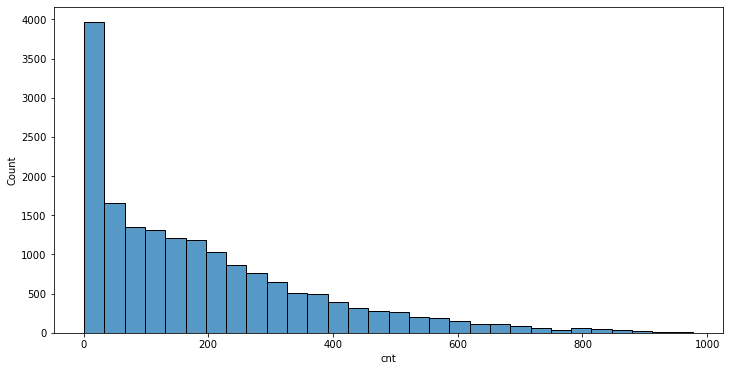

In [9]:
# Um die Größe der Abbildung zu definieren, muss man das Matplotlib-Objekt Figure im Voraus erstellen und dabei angeben, wie groß die Abbildung ist.
plt.figure(figsize=(12,6))

# sb = Seaborn 
# cnt = Count of total rental bikes including both casual and registered
sb.histplot( data=data, x="cnt", bins=30)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

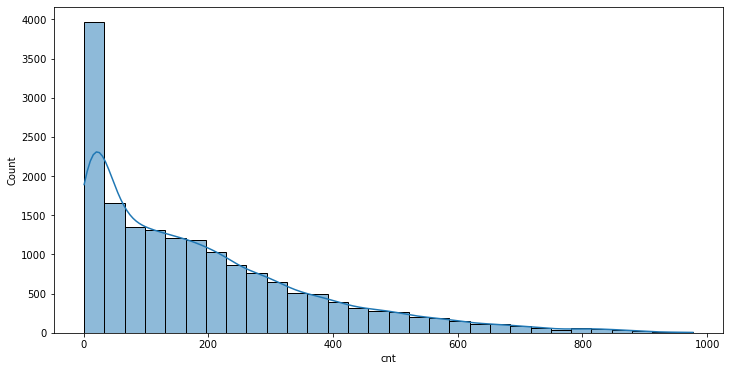

In [10]:
# Um die Größe der Abbildung zu definieren, muss man das Matplotlib-Objekt Figure im Voraus erstellen und dabei angeben, wie groß die Abbildung ist.
plt.figure(figsize=(12,6))

# sb = Seaborn 
# cnt = Count of total rental bikes including both casual and registered
sb.histplot( data=data, x="cnt", bins=30, kde=1,)

Die Histogramme werden nun für alle numerischen Merkmale erstellt. Dazu kann man einfach den Pandas Befehl *hist()* verwenden. 

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>],
       [<AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

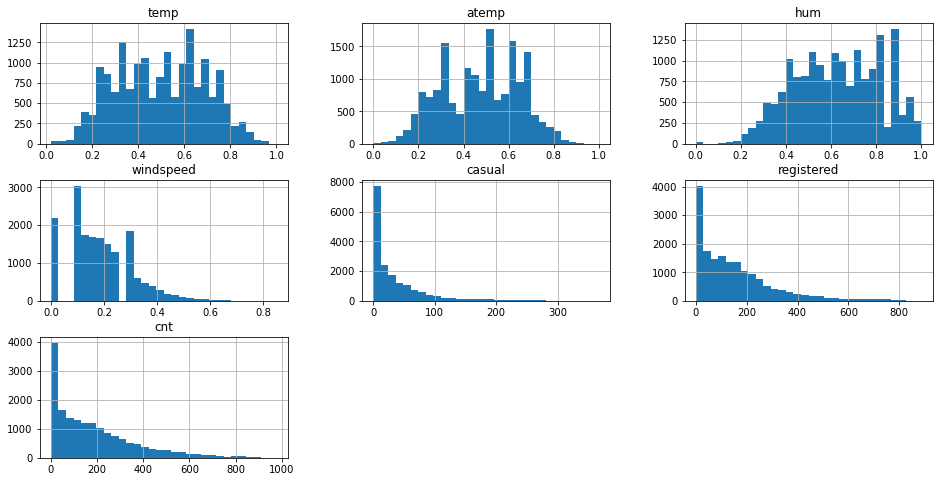

In [11]:
data.hist(figsize=(16,8), bins=30)

Die Funktion *displot* ist die allgemeinere Funktion zur Visualisierung von Verteilungen.

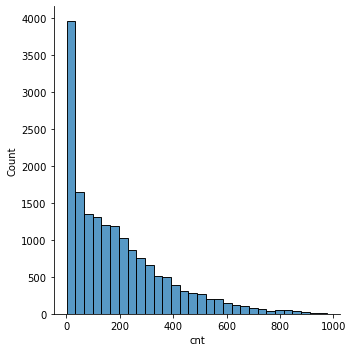

In [12]:
sb.displot(data, x="cnt", bins=30)

Ein Histogramm kann man mit dem Parameter *stat="density"* normalisieren. Ohne Angabe des Parameters werden die Vorkommen einfach gezählt (*stat="count"*).

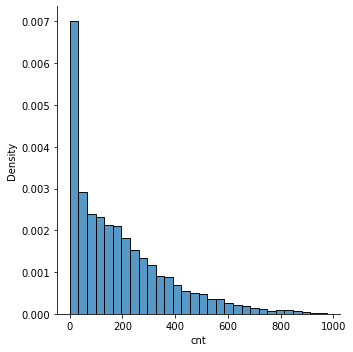

In [13]:
sb.displot(data, x="cnt", bins=30, stat="density")

Ein Histogramm zielt darauf ab, die zugrunde liegende Wahrscheinlichkeitsdichtefunktion, die die Daten generiert hat, durch Binning und Zählen von Beobachtungen zu approximieren. Die Kernel-Dichte-Schätzung (KDE) stellt eine andere Lösung für dasselbe Problem dar. Anstatt diskrete Bins zu verwenden, glättet eine KDE-Darstellung die Beobachtungen mit einem Gaußschen Kernel und erzeugt so eine kontinuierliche Dichteschätzung. Dazu verwendet man den Parameter *kde=True*

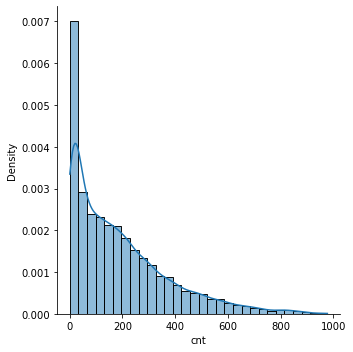

In [14]:
sb.displot(data, x="cnt", bins=30, stat="density", kde=True)

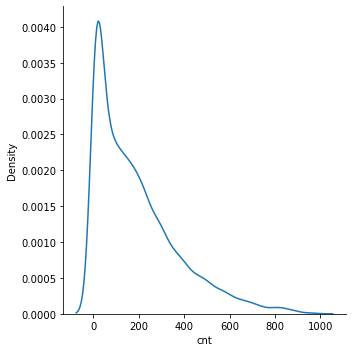

In [15]:
# nur die Dichte-Schätzung anzeigen 
sb.displot(data, x="cnt", kind="kde")

Man kann damit auch ein Histogramm für kategoriale Daten erzeugen. Voraussetzung ist, dass die Kategorien geordnet sind. Dies kann man mit dem Befehl *cat.as_ordered()* erreichen.

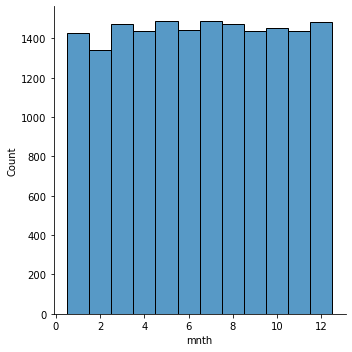

In [16]:
sb.displot(data, x=data["mnth"].cat.as_ordered())

## Lagemaße

Lagemaße beschreiben die Verteilung der Daten. 

* Mittelwert - Dieser Wert ist der Durchschnitt eines Satzes von Stichproben. Das heißt, er stellt die Summe der Werte des Merkmals für jede Probe geteilt durch die Anzahl der Proben dar.
* Modus - Der Modus wird als "Spitze" des Histogramms identifiziert. Verteilungen können einen Modus (unimodale Verteilungen) oder zwei Modi (bimodale Verteilungen) haben.
* Median - Dieser Wert stellt den Mittelwert der Verteilung dar. Es ist die Zahl, bei der die Hälfte der Beobachtungen darüber und die Hälfte darunter liegt.

In [17]:
# für einzelne Spalten 
data['temp'].mean()


0.4969871684216583

In [18]:
data['temp'].median()

0.5

In [19]:
# für alle Merkmale
data.mean()

temp            0.496987
atemp           0.475775
hum             0.627229
windspeed       0.190098
casual         35.676218
registered    153.786869
cnt           189.463088
dtype: float64

In [20]:
data.mean()

temp            0.496987
atemp           0.475775
hum             0.627229
windspeed       0.190098
casual         35.676218
registered    153.786869
cnt           189.463088
dtype: float64

In [21]:
data.mode()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,3,1,5,16,0,6,1,1,0.62,0.6212,0.88,0.0,0.0,4.0,5.0
1,NaN,NaN,7,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Streuungsmaße

Die Streuung wird u.a. mit folgenden Maßen beschrieben:

* **Range** - Dieses Maß stellt den Abstand zwischen dem kleinsten und dem größten Datenpunkt dar.
* **Interquartilsbereich (IQR)** - Während der Bereich die gesamten Daten umfasst, gibt der IQR an, wo sich die mittleren 50 Prozent der Daten befinden. Wenn wir nach diesem Wert suchen, suchen wir zuerst nach dem Median M, da er die Daten in zwei Hälften teilt. Dann suchen wir den Median des unteren Endes der Daten (bezeichnet als Q1) und den Median des oberen Endes der Daten (bezeichnet als Q3). Die Daten zwischen Q1 und Q3 sind der IQR.
* **Standardabweichung** - Dieses Maß gibt den durchschnittlichen Abstand zwischen Datenpunkten und dem Mittelwert an. Im Wesentlichen quantifiziert es die Streuung einer Verteilung. 

In [22]:
data['temp'].describe()

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [23]:
# für alle numerischen Merkmale
data.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
# Ergebnisse zur besseren Übersichtlichkeit runden
round(data.describe(),2)

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,1.00,1.00,1.00,0.85,367.00,886.00,977.00


## Korrelationsanalyse


<AxesSubplot:xlabel='cnt', ylabel='registered'>

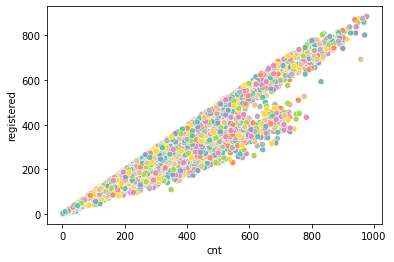

In [25]:
# Scatterplot
sb.scatterplot(x=data['cnt'], y=data['registered'], hue=data['cnt'], legend=False, palette="Set2")

Um  Scatterplots für zwei Merkmale zu erstellen, verwendet man die Funktion *scatterplot* aus dem Seaborn-Modul. Es gibt jedoch eine Funktion namens *pairplot* aus der gleichen Bibliothek, mit der man die Beziehungen aller quantitativen Merkmale darstellen kann. Die Berechungen und die Visualisierung benötigen etwas Zeit.

In [26]:
sb.pairplot(numerical_features, height=2)

NameError: name 'numerical_features' is not defined

Eine **Korrelationsmatrix** besteht aus Korrelationskoeffizienten für jede Merkmalsbeziehung. Der Korrelationskoeffizient ist ein Maß, das Informationen über die Stärke und Richtung einer linearen Beziehung zwischen zwei quantitativen Merkmalen gibt. Dieser Koeffizient kann einen Wert aus dem Bereich -1 tо 1 annehmen. Wenn der Wert näher an -1 oder 1 ist, ist die Beziehung stärker. Um diese Information zu erhalten, verwenden wir eine Kombination von Pandas- und Seaborn-Modulen. 

In [ ]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig,ax= plt.subplots()
fig.set_size_inches(20,10)

sb.heatmap(corrMatt, cmap="Blues", mask=mask,vmax=.8, square=True,annot=True)

Count und Registered sowie Temperatur und Normalized Temperature weißen eine starke positive lineare Beziehung auf.